In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

- h12_g3 : 성별(1 : 남자, 2 : 여자, 9 : 모름/무응답)
- h12_g4 : 태어난 년도(1900 ~ 2014, 9999 : 모름/무응답)
- h12_g10 : 혼인상태(0 : 미해당, 1 : 유배우, 2 : 사별, 3 : 이혼, 4 : 별거, 5 : 미혼(18세 이상, 미혼모 포함), 6 : 기타, 9 : 모름/무응답
- h12_g11 : 종교(1 : 있음, 2 : 없음, 9 : 모름/무응답)
- h12_eco9 : 직종(직종코드표, 9999 : 모름/무응답)
- p1202_8aq1 : 일을 한 달의 월 평균 임금(1 ~ 9998, 만원 단위, 9999 : 모름/무응답)
- h12_reg7 : 7개 권역별 지역 부분(1 : 서울, 2 : 수도권(인천/경기), 3 : 부산/경남/울산, 4 : 대구/경북, 5 : 대전/충남, 6 : 강원/충북, 7 : 광주/전남/전북/제주도


- 조사대상에서 남녀 성별 비를 파악한다.
- 성별에 따라 평균 월급 차이 분석
- 나이에 따른 평균 임금의 변화
- 종교 유무에 따른 이혼비율

In [97]:
df = pd.read_excel('data/dataset2017.xlsx')

In [98]:
df

,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15417,9800,7,1,98000701,1,NaN,735.488155,0.221339,735.488155,0.221339,...,NaN,NaN,NaN,NaN,NaN,NaN,979.0,NaN,0,NaN
15418,9800,7,1,98000701,1,NaN,898.395613,0.270365,898.395613,0.270365,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
15419,9800,7,1,98000701,1,NaN,2686.353997,0.808438,2676.190322,0.805379,...,NaN,NaN,NaN,NaN,NaN,NaN,868.0,NaN,0,NaN
15420,9800,7,1,98000701,1,NaN,841.651153,0.253288,841.651153,0.253288,...,NaN,NaN,NaN,NaN,NaN,NaN,518.0,NaN,0,NaN


In [99]:
people = df['h12_g3'].value_counts().sort_index()
people

1    6982
2    8440
Name: h12_g3, dtype: int64

In [100]:
all_people = len(df['h12_g3'])

## 조사대상에서 남녀 성별 비를 파악한다.

In [101]:
print('남자 ' , ((people.iloc[0] / all_people)*100).round(2), '%')
print('여자 ' , ((people.iloc[1] / all_people)*100).round(2), '%')

남자  45.27 %
여자  54.73 %


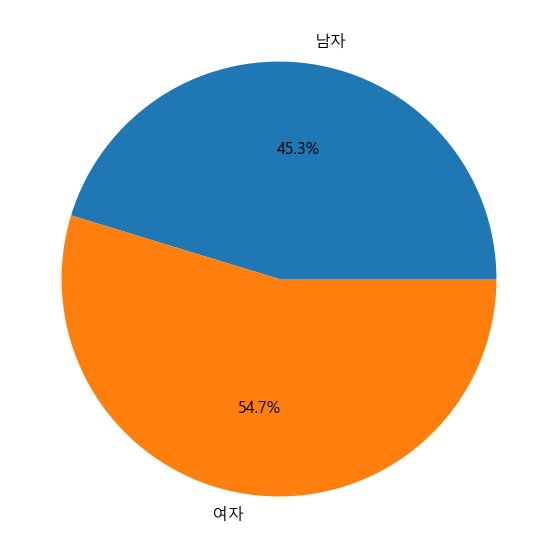

In [102]:
plt.pie( df['h12_g3'].value_counts().sort_index() , labels = ['남자', '여자'], autopct='%.1f%%')
plt.show()

## 성별에 따라 평균 월급 차이 분석

- h12_g3 : 성별(1 : 남자, 2 : 여자, 9 : 모름/무응답)

In [103]:
len(df['p1202_8aq1'])

15422

In [104]:
df['p1202_8aq1'].isna().sum()

10915

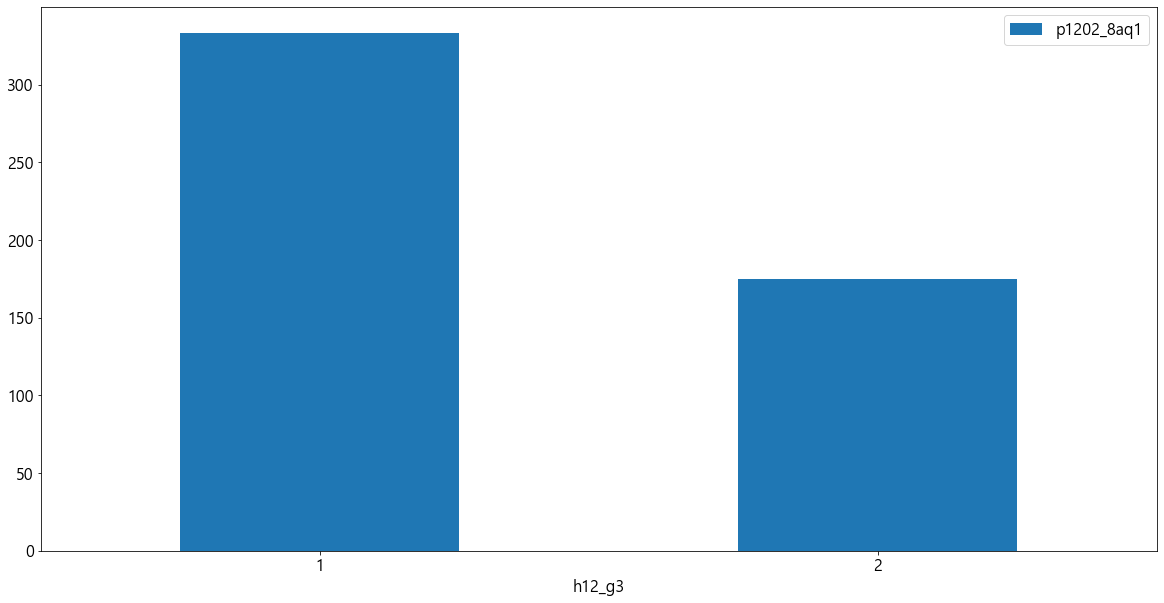

In [105]:
df[['h12_g3','p1202_8aq1']].groupby(by='h12_g3').mean().plot(kind='bar', rot= 0)
plt.show()

In [106]:
drop_df = df[['p1202_8aq1','h12_g3']].dropna()
len(drop_df)

4507

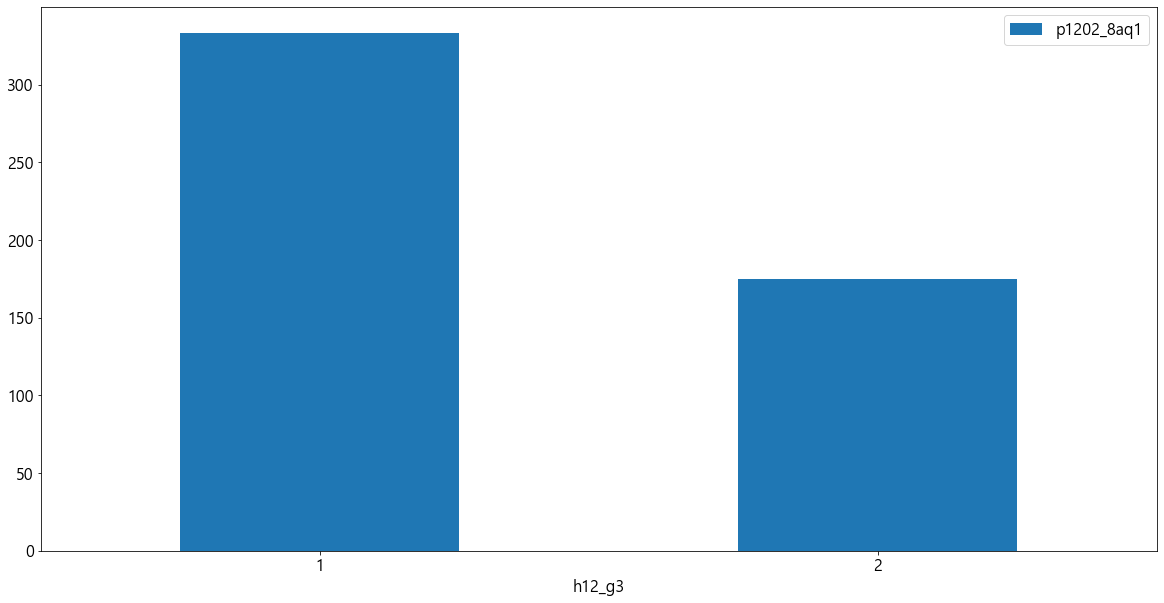

In [107]:
drop_df.groupby(by='h12_g3').mean().plot(kind='bar', rot= 0)
plt.show()

In [108]:
df[['h12_g3','p1202_8aq1']].describe()

,h12_g3,p1202_8aq1
count,15422.000000,4507.000000
mean,1.547270,257.950073
std,0.497777,192.706107
min,1.000000,0.000000
25%,1.000000,135.000000
50%,2.000000,208.000000
75%,2.000000,336.000000
max,2.000000,1874.000000


# 나이에 따른 평균 임금의 변화

In [109]:
df['age'] = 2020 - df['h12_g4']

In [110]:
drop_na_age = df[['age','p1202_8aq1']].dropna()

In [111]:
drop_na_age.groupby( by = 'age').mean()

,p1202_8aq1
age,
22,89.333333
23,136.720000
24,140.807692
25,138.000000
26,145.652000
...,...
88,21.200000
89,25.000000
90,20.000000


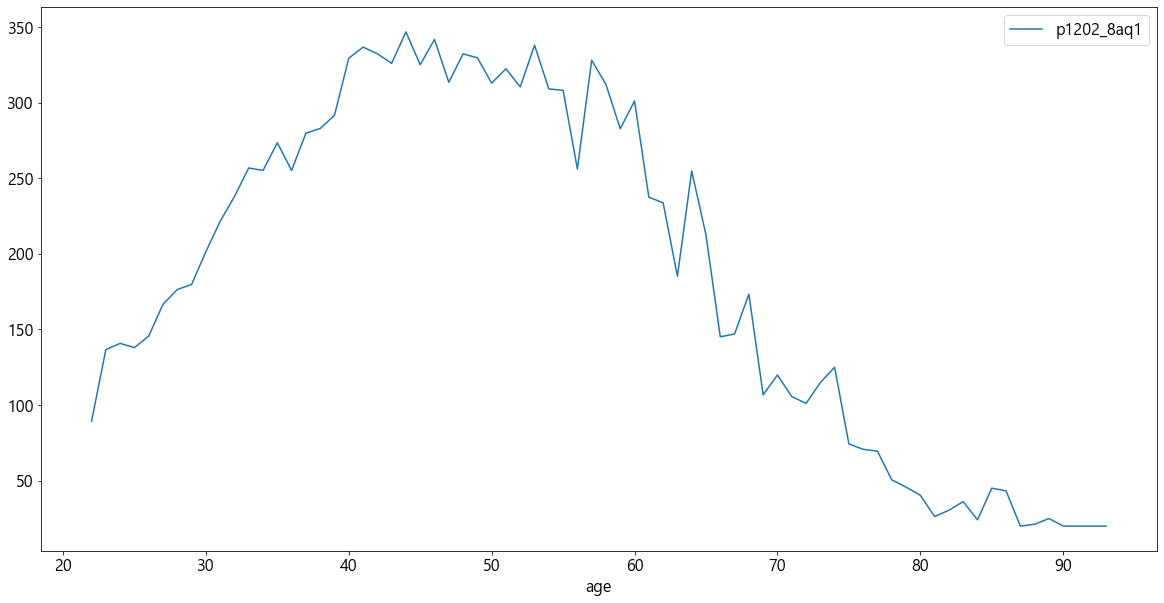

In [112]:
drop_na_age.groupby( by = 'age').mean().plot()
plt.show()

# 종교 유무에 따른 이혼비율

In [113]:
df_religion = df[['h12_g11','h12_g10']]

In [114]:
df_religion.isna().sum()

h12_g11    0
h12_g10    0
dtype: int64

In [115]:
df_religion['h12_g10'].value_counts()

1    7763
0    2484
5    2352
2    2022
3     697
4      87
6      17
Name: h12_g10, dtype: int64

In [116]:
df_religion[df_religion['h12_g10']==3].groupby('h12_g11').count()

,h12_g10
h12_g11,
1,315
2,382


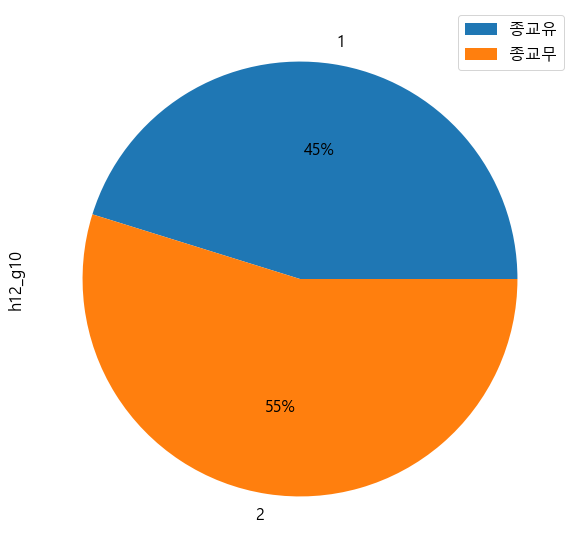

In [129]:
df_religion[df_religion['h12_g10']==3].groupby('h12_g11').count().plot(kind= 'pie', rot=0,subplots=True,autopct='%.0f%%')
plt.legend(['종교유','종교무'])
plt.show()

# 같이 해보기

In [1]:
# 경고 메시지가 안나오게..

import warnings
warnings.filterwarnings('ignore')


# 기본
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# KFold
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold

# 데이터 전처리
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 하이퍼 파라미터 튜닝
from sklearn.model_selection import GridSearchCV

# 평가함수
from sklearn.metrics import accuracy_score

# 머신러닝 알고리즘 - 분류
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier


# 머신러닝 알고리즘 - 회귀
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor

# 교차검증 함수
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

#군집
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift

# 차원축소
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# 저장
import pickle

# 그래프 설정
plt.rcParams['font.family']= 'Malgun Gothic'
# plt.rcParams['font.family']= 'AppleGothic'
plt.rcParams['font.size']  = 16
plt.rcParams['figure.figsize'] = (20,10)
plt.rcParams['axes.unicode_minus'] = False

### 데이터를 가져온다.

In [3]:
# sheet_name : 생략하면 첫번째 시트가 지정, 시트의 이름이나 0시터 시작하는 
# 인덱스를 셋팅해 시트를 선택할 수 있다.
df1 = pd.read_excel('data/dataset2017.xlsx', sheet_name='Sheet1')
df1.head()


,h12_id,h12_ind,h12_sn,h12_merkey,h_new,h12_cobf,p12_wgl,p12_wsl,p12_wgc,p12_wsc,...,da12_326,da12_327,da12_328,da12_6aq14,da12_6aq15,h12_pers_income1,h12_pers_income2,h12_pers_income3,h12_pers_income4,h12_pers_income5
0,1,1,1,10101,0,NaN,953.482054,0.286943,948.140524,0.285336,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1,2,1,1,20101,0,NaN,1238.891352,0.372835,1238.891352,0.372835,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
2,3,1,1,30101,0,NaN,1282.051947,0.385824,1282.051947,0.385824,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,4,1,1,40101,0,NaN,1066.327201,0.320903,1066.327201,0.320903,...,NaN,NaN,NaN,NaN,NaN,NaN,3418.0,NaN,0,NaN
4,4,1,1,40101,0,NaN,1390.617192,0.418496,1382.826774,0.416151,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


### 필요한 컬럼만 추출

In [8]:
columns_list = ['h12_g3', 'h12_g4', 'h12_g10', 'h12_g11', 'h12_eco9','p1202_8aq1', 'h12_reg7']
df_all = df1[columns_list]
df_all


,h12_g3,h12_g4,h12_g10,h12_g11,h12_eco9,p1202_8aq1,h12_reg7
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [10]:
# 컬럼 이름 변경
a1 = ['성별', '출생년도', '혼인상태', '종교유무', '직종', '평균임금', '지역']
df_all.columns = a1
df_all

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


### 데이터 프레임 확인

In [13]:
# 데이터 프레임 요약 정보
df_all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15422 entries, 0 to 15421
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   성별      15422 non-null  int64  
 1   출생년도    15422 non-null  int64  
 2   혼인상태    15422 non-null  int64  
 3   종교유무    15422 non-null  int64  
 4   직종      7131 non-null   float64
 5   평균임금    4507 non-null   float64
 6   지역      15422 non-null  int64  
dtypes: float64(2), int64(5)
memory usage: 843.5 KB


info 를 통해 숫자가 차이가나면 그 그 숫자차이만큼 결측치인거임

- 로우는 15422개
- 컬럼은 7개
- 문자열 (object) 컬럼은 존재하지 않는다

In [14]:
# 결측치 확인
# isna() -> 결측치인 부분은 True, 결측치가 아닌 부분은 False
# sum() 총합. True는 1, False는 0으로 취급한다.
df_all.isna().sum()

성별          0
출생년도        0
혼인상태        0
종교유무        0
직종       8291
평균임금    10915
지역          0
dtype: int64

In [16]:
# 이상치 확인 - 범위형 데이터
df_all[['출생년도','평균임금']].describe()

,출생년도,평균임금
count,15422.000000,4507.000000
mean,1968.436195,257.950073
std,24.321489,192.706107
min,1907.000000,0.000000
25%,1947.000000,135.000000
50%,1967.000000,208.000000
75%,1989.000000,336.000000
max,2016.000000,1874.000000


명세서에서 평균임금의 0에 대한 언급이 없으니 이상치로 생각하고 제거할거임
- 출생년도에 2014를 초과하는 이상치가 존재한다.
- 평균임금에 0이라는 이상치가 존재한다.

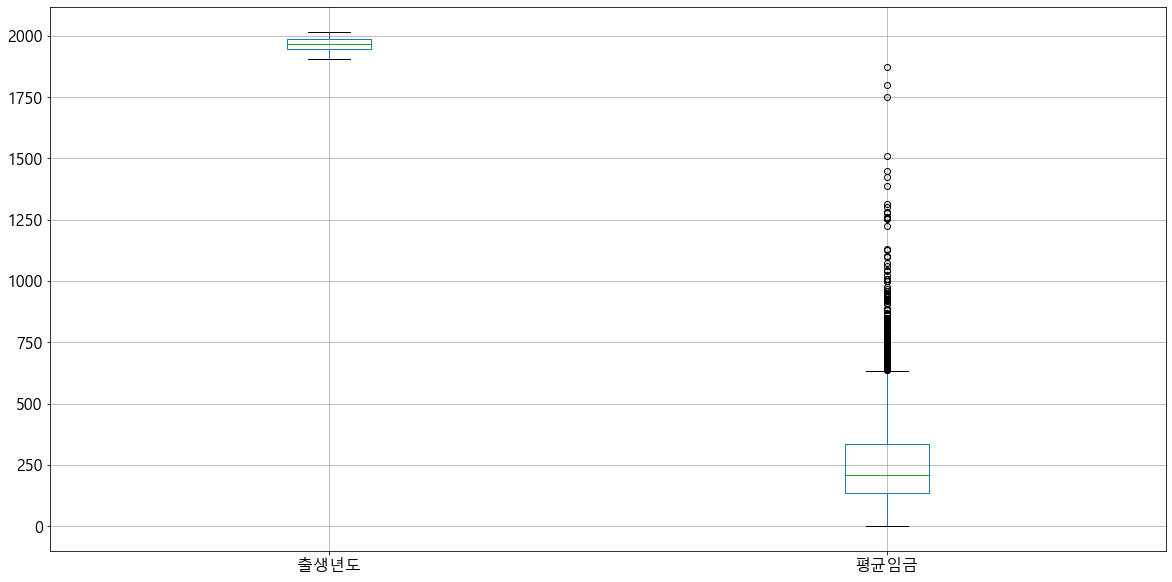

In [18]:
# 극단치 확인
df_all[['출생년도','평균임금']].boxplot()
plt.show()

In [20]:
# 레이블형 데이터의 이상치 확인
a1 = df_all['성별'].value_counts()
a3 = df_all['혼인상태'].value_counts()
a4 = df_all['종교유무'].value_counts()
a5 = df_all['직종'].value_counts()
a6 = df_all['평균임금'].value_counts()
a7 = df_all['지역'].value_counts()

display(a1)
display(a3)
display(a4)
display(a5)
display(a6)
display(a7)

2    8440
1    6982
Name: 성별, dtype: int64

1    7763
0    2484
5    2352
2    2022
3     697
4      87
6      17
Name: 혼인상태, dtype: int64

2    8122
1    7300
Name: 종교유무, dtype: int64

611.0    1154
521.0     367
941.0     315
312.0     283
930.0     263
         ... 
212.0       2
620.0       1
871.0       1
872.0       1
283.0       1
Name: 직종, Length: 148, dtype: int64

20.0     181
150.0     92
100.0     82
200.0     78
250.0     69
        ... 
827.0      1
256.3      1
711.0      1
824.0      1
79.3       1
Name: 평균임금, Length: 822, dtype: int64

2    3492
7    2749
3    2564
1    2208
4    1874
5    1355
6    1180
Name: 지역, dtype: int64

- 위의 레이블형 데이터에는 이상치가 존재하지 않는다.

### 데이터 전처리

In [68]:
# 데이터 프레임 복제

df_copy= df_all.copy()
df_copy

,성별,출생년도,혼인상태,종교유무,직종,평균임금,지역
0,2,1936,2,2,NaN,NaN,1
1,2,1945,2,2,NaN,NaN,1
2,1,1948,2,2,NaN,NaN,1
3,1,1942,3,1,762.0,108.9,1
4,2,1923,2,1,NaN,NaN,1
...,...,...,...,...,...,...,...
15417,2,1967,1,1,952.0,NaN,5
15418,2,1992,5,1,NaN,NaN,5
15419,1,1995,5,1,521.0,72.0,5
15420,2,1998,5,1,432.0,NaN,5


In [69]:
# 성별에 저장되어있는 데이터를 확인한다.
df_copy['성별'].value_counts()

2    8440
1    6982
Name: 성별, dtype: int64

In [70]:
map1 = {
    1: '남자',
    2: '여자',
    9: '모름/무응답'
}

df_copy['성별'] = df_copy['성별'].map(map1)
df_copy['성별'].value_counts()

여자    8440
남자    6982
Name: 성별, dtype: int64

In [71]:
# 혼인상태에 저장된 값의 종류를 확인한다
df_copy['혼인상태'].value_counts()

1    7763
0    2484
5    2352
2    2022
3     697
4      87
6      17
Name: 혼인상태, dtype: int64

In [72]:
map2 = {
    0 : '미해당', 
    1 : '유배우', 
    2 : '사별', 
    3 : '이혼', 
    4 : '별거', 
    5 : '미혼(18세 이상, 미혼모 포함)', 
    6 : '기타', 
    9 : '모름/무응답'
}

df_copy['혼인상태'] = df_copy['혼인상태'].map(map2)
df_copy['혼인상태'].value_counts()


유배우                   7763
미해당                   2484
미혼(18세 이상, 미혼모 포함)    2352
사별                    2022
이혼                     697
별거                      87
기타                      17
Name: 혼인상태, dtype: int64

In [73]:
map3 = {
    1 : '있음', 
    2 : '없음', 
    9 : '모름/무응답'
}

df_copy['종교유무'] = df_copy['종교유무'].map(map3)
df_copy['종교유무'].value_counts()


없음    8122
있음    7300
Name: 종교유무, dtype: int64

In [74]:
map4 = {
    1 : '서울', 
    2 : '수도권(인천/경기)',
    3 : '부산/경남/울산', 
    4 : '대구/경북', 
    5 : '대전/충남',
    6 : '강원/충북', 
    7 : '광주/전남/전북/제주도'
}

df_copy['지역'] = df_copy['지역'].map(map4)
df_copy['지역'].value_counts()


수도권(인천/경기)      3492
광주/전남/전북/제주도    2749
부산/경남/울산        2564
서울              2208
대구/경북           1874
대전/충남           1355
강원/충북           1180
Name: 지역, dtype: int64

## 조사 대상에서 남녀 성비를 파악한다.

In [75]:
a1 = df_copy['성별'].value_counts()
a1

여자    8440
남자    6982
Name: 성별, dtype: int64

In [76]:
# 그래프를 그리기 위해 데이터 프레임을 구성한다.
df_gender = pd.DataFrame(a1)
df_gender

,성별
여자,8440
남자,6982


In [77]:
df_gender = pd.DataFrame(a1)
df_gender.columns = ['명']
df_gender


,명
여자,8440
남자,6982


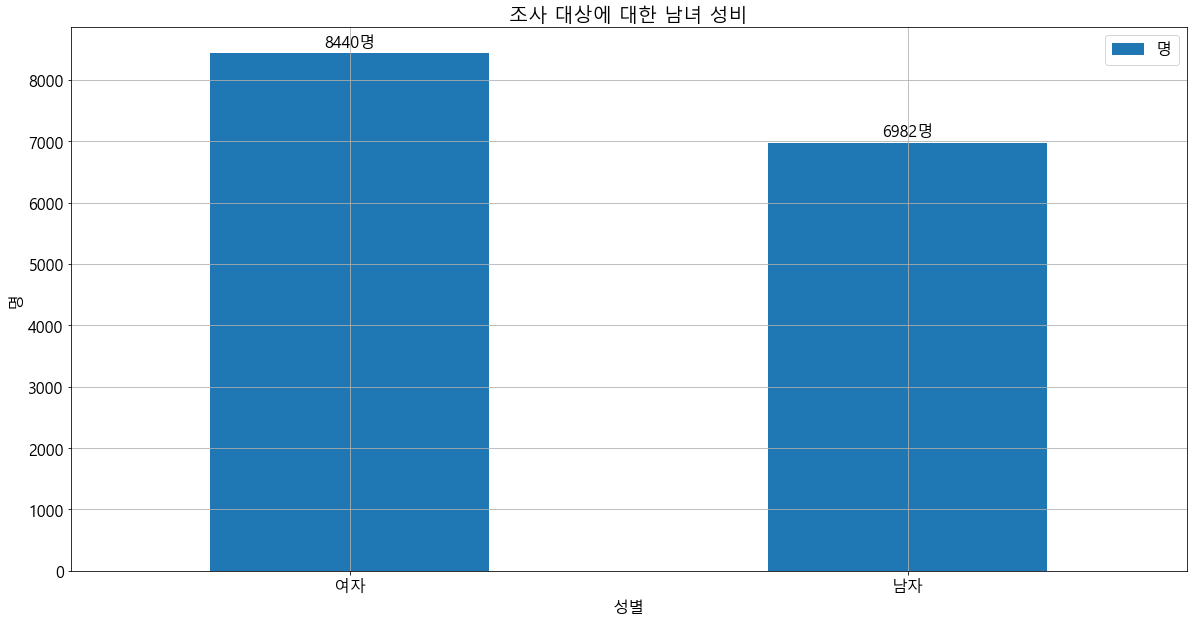

In [78]:
df_gender.plot.bar( rot=0)

# 그래프 제목
plt.title( '조사 대상에 대한 남녀 성비')

#그리드
plt.grid()

# 축 이름
plt.xlabel('성별')
plt.ylabel('명')


for idx, value in enumerate(df_gender['명']) :
#     print(idx)
#     print(value)
    plt.text(idx,value + 100 ,f'{int(value)}명', horizontalalignment='center')


plt.show()

조사 대상은 여자가 8440명,  남자가 6982명으로 여자가 많다

# 성별에 따른 평균 월급 차이 분석

In [79]:
# 성별과 평균 임금 데이터를 가져온다.
df_sal = df_copy[['성별', '평균임금']]
df_sal.head()

,성별,평균임금
0,여자,NaN
1,여자,NaN
2,남자,NaN
3,남자,108.9
4,여자,NaN


In [80]:
# 결측치 소거
df_sal.dropna(inplace = True)
df_sal.isna().sum()

성별      0
평균임금    0
dtype: int64

In [81]:
# 성별을 기준으로 급여의 평균을 구한다.
df_sal_avg = df_sal.groupby('성별').mean()

In [82]:
df_sal_avg

,평균임금
성별,
남자,333.280785
여자,175.293108


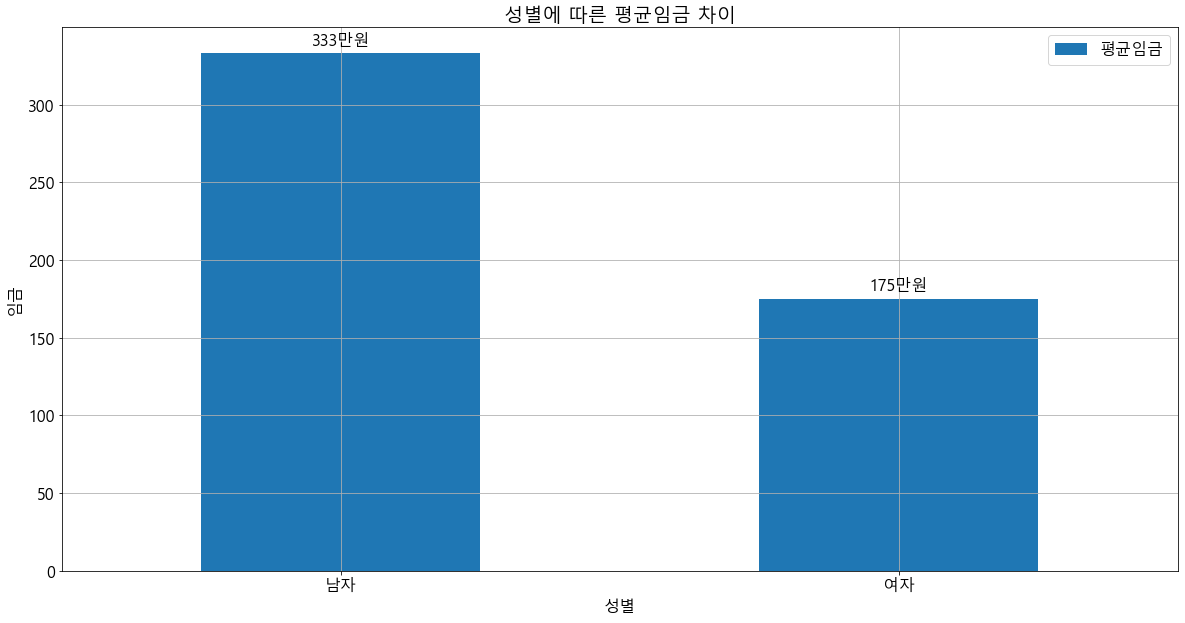

In [83]:
df_sal_avg.plot.bar( rot=0)

# 그래프 제목
plt.title( '성별에 따른 평균임금 차이')

#그리드
plt.grid()

# 축 이름
plt.xlabel('성별')
plt.ylabel('임금')


for idx, value in enumerate(df_sal_avg['평균임금']) :
#     print(idx)
#     print(value)
    plt.text(idx,value + 5 ,f'{int(value)}만원', horizontalalignment='center')


plt.show()

남자가 여자보다 평균 급여가 높다.

### 나이에 따른 평균 임금 변화

기온에 따라 감여자수가 달라짐

<pre>
선 - 변환
막대 - 양비교
산점도 - 분포
파이 - 비율비교
워드크라우드 -> 단어 빈도수

In [89]:
df_tmp = df_copy[['출생년도','평균임금']]

In [85]:
df_tmp

,출생년도,평균임금
0,1936,NaN
1,1945,NaN
2,1948,NaN
3,1942,108.9
4,1923,NaN
...,...,...
15417,1967,NaN
15418,1992,NaN
15419,1995,72.0
15420,1998,NaN


In [93]:
# 출생년도가 2015 이상한 로우들의 인덱스를 가져온다
tmp_idx = df_tmp.query('출생년도 >= 2015').index
df_tmp.drop(tmp_idx, inplace = True)

df_tmp.query('출생년도 >= 2015')

,출생년도,평균임금


In [62]:
# 나이를 구한다.
df_tmp['나이'] = 2017 - df_tmp['출생년도']
df_tmp

,출생년도,평균임금,나이
0,1936,NaN,81
1,1945,NaN,72
2,1948,NaN,69
3,1942,108.9,75
4,1923,NaN,94
...,...,...,...
15417,1967,NaN,50
15418,1992,NaN,25
15419,1995,72.0,22
15420,1998,NaN,19


In [63]:
df_tmp.drop('출생년도', axis=1, inplace=True)

In [64]:
df_tmp

,평균임금,나이
0,NaN,81
1,NaN,72
2,NaN,69
3,108.9,75
4,NaN,94
...,...,...
15417,NaN,50
15418,NaN,25
15419,72.0,22
15420,NaN,19


In [65]:
# 결측치를 확인한다
df_tmp.isna().sum()

평균임금    10915
나이          0
dtype: int64

In [66]:
df_tmp.dropna(inplace=True)
df_tmp.isna().sum()

평균임금    0
나이      0
dtype: int64

In [67]:
df_avg = df_tmp.groupby('나이').mean()
df_avg

,평균임금
나이,
19,89.333333
20,136.720000
21,140.807692
22,138.000000
23,145.652000
...,...
85,21.200000
86,25.000000
87,20.000000


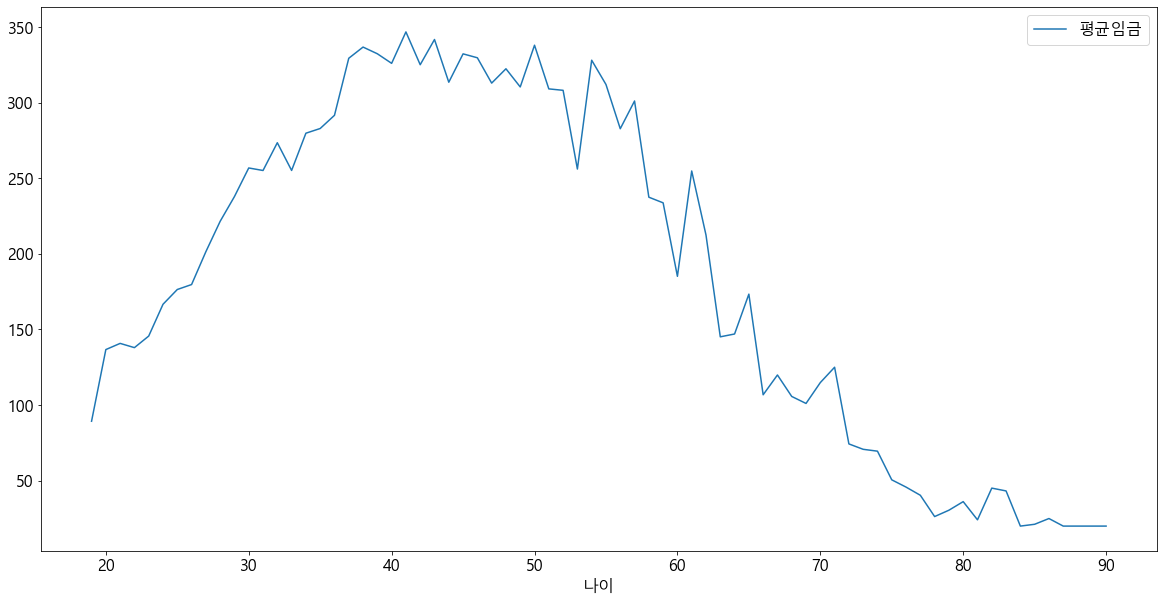

In [94]:
df_avg.plot()

plt.show()


# 종교 유무에 따른 이혼비율

In [136]:
tmp_df2 = df_copy[['종교유무','혼인상태']]
tmp_df2

,종교유무,혼인상태
0,없음,사별
1,없음,사별
2,없음,사별
3,있음,이혼
4,있음,사별
...,...,...
15417,있음,유배우
15418,있음,"미혼(18세 이상, 미혼모 포함)"
15419,있음,"미혼(18세 이상, 미혼모 포함)"
15420,있음,"미혼(18세 이상, 미혼모 포함)"


In [137]:
# 결측치 확인
tmp_df2.isna().sum()

종교유무    0
혼인상태    0
dtype: int64

In [139]:
# 미해당, 미혼을 제외한다.
idx2 = tmp_df2.query('혼인상태 == "미해당"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "미혼(18세 이상, 미혼모 포함)"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "기타"').index
tmp_df2.drop(idx2, inplace=True)

idx2 = tmp_df2.query('혼인상태 == "모름/무응답"').index
tmp_df2.drop(idx2, inplace=True)

tmp_df2['혼인상태'].value_counts()


유배우    7763
사별     2022
이혼      697
별거       87
Name: 혼인상태, dtype: int64

In [140]:
# 이혼한 사람들의 데이터
tmp_df200 = tmp_df2.query('혼인상태 == "이혼"')
tmp_df300 = tmp_df2.query('혼인상태 != "이혼"')

display(tmp_df200)
display(tmp_df300)

,종교유무,혼인상태
3,있음,이혼
11,있음,이혼
33,있음,이혼
47,없음,이혼
64,있음,이혼
...,...,...
15337,있음,이혼
15342,없음,이혼
15373,없음,이혼
15374,없음,이혼


,종교유무,혼인상태
0,없음,사별
1,없음,사별
2,없음,사별
4,있음,사별
5,있음,유배우
...,...,...
15413,있음,유배우
15414,없음,유배우
15415,없음,유배우
15416,있음,유배우


In [141]:
# 이혼한 사람들의 종교 유무를 파악한다.
a1 = tmp_df200.groupby('종교유무').count()
a1.columns = ['명']
a1

,명
종교유무,
없음,382
있음,315


In [142]:
# 이혼하지 않은 사람들의 종교 유무를 파악한다.
a2 = tmp_df300.groupby('종교유무').count()
a2.columns = ['명']
a2

,명
종교유무,
없음,4759
있음,5113


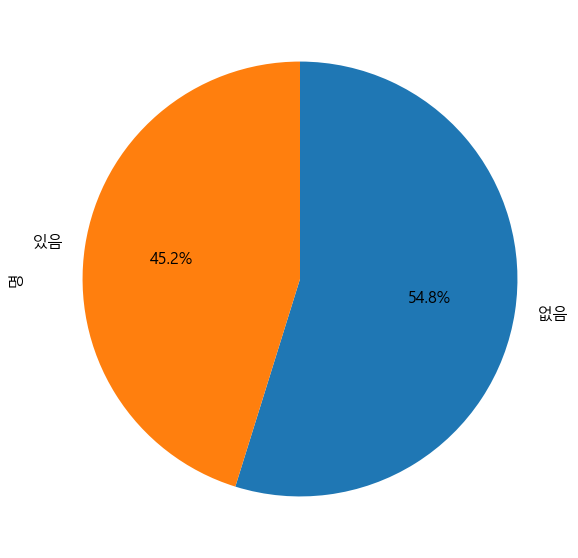

<Figure size 720x432 with 0 Axes>

In [148]:
# 이혼한 사람들의 종교 유무 비율
a1['명'].plot.pie( startangle= 90, counterclock=False, autopct = '%0.1f%%' )
plt.figure(figsize=(10,6))
plt.show()

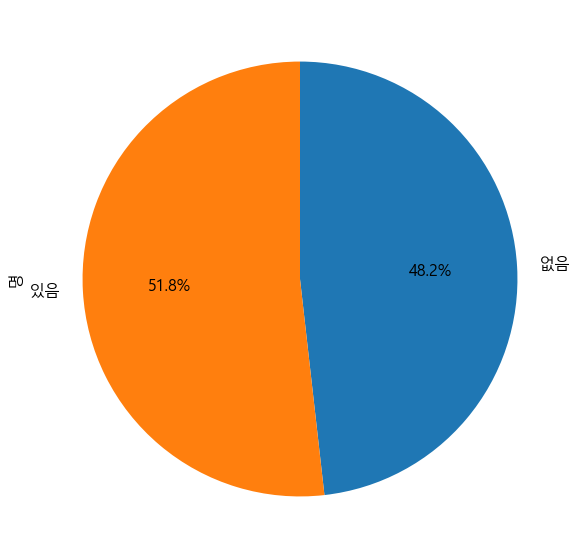

<Figure size 720x432 with 0 Axes>

In [149]:
# 이혼한 사람들의 종교 유무 비율
a2['명'].plot.pie( startangle= 90, counterclock=False, autopct = '%0.1f%%' )
plt.figure(figsize=(10,6))
plt.show()